In [49]:
# imports
import pandas as pd
import requests
import json
!pip install geopy
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [34]:
from geopy.distance import geodesic


In [22]:
import pandas as pd

# Load DataFrames from 'data/' directory
stations_Monaco_df = pd.read_csv('../data/Monaco_bike_stations.csv')
yelp_df = pd.read_csv('../data/yelp_df.csv')


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
# Function to calculate distance
def calculate_distance(row, lat, lon):
    return geodesic((row['latitude'], row['longitude']), (lat, lon)).meters

# list to store results
rows = []

for _, station in stations_Monaco_df.iterrows():
    for _, yelp in yelp_df.iterrows():
        distance = calculate_distance(station, yelp['lat'], yelp['lon'])
        if distance <= 500: 
            rows.append({
                "station_name": station['name'],
                "yelp_name": yelp['name'],
                "distance": distance,
                **station.to_dict(),
                **yelp.to_dict()
            })

# Convert results to DataFrame
combined_df = pd.DataFrame(rows)
print(combined_df.head())


     station_name      yelp_name    distance           name   latitude  \
0  Grimaldi Forum     New Indian  481.870037     New Indian  43.743545   
1  Grimaldi Forum          Twiga  278.421562          Twiga  43.743545   
2  Grimaldi Forum  Premier Kebap  402.096402  Premier Kebap  43.743545   
3  Grimaldi Forum         Apsara  310.618829         Apsara  43.743545   
4  Grimaldi Forum     La Véranda  479.980794     La Véranda  43.743545   

   longitude  available_bikes  empty_slots     category  \
0   7.431086                3           13       Indian   
1   7.431086                3           13  Dance Clubs   
2   7.431086                3           13      Turkish   
3   7.431086                3           13       Korean   
4   7.431086                3           13  Restaurants   

                                             address  rating        lat  \
0          9 bd République, 06240 Beausoleil, France     4.0  43.742530   
1          Blve.Louis II 35, 98000 Zacatecas, Mexi

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

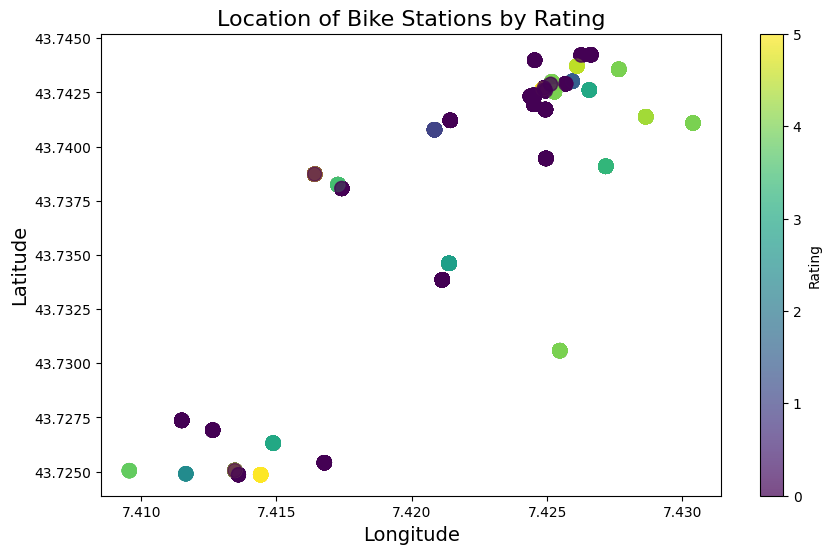

In [47]:
# scatterplot to explore relationship between lat and lon vs. Yelp ratings
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['lon'], combined_df['lat'], c=combined_df['rating'], cmap='viridis', s=100, alpha=0.7)

# Add titles + labels
plt.title('Location of Bike Stations by Rating', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.colorbar(label='Rating')
plt.show()



/var/folders/ht/07m0mmwn0szddtnjjpgwgnhh0000gn/T/ipykernel_74892/783075956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='category', y='rating', palette='Set2')


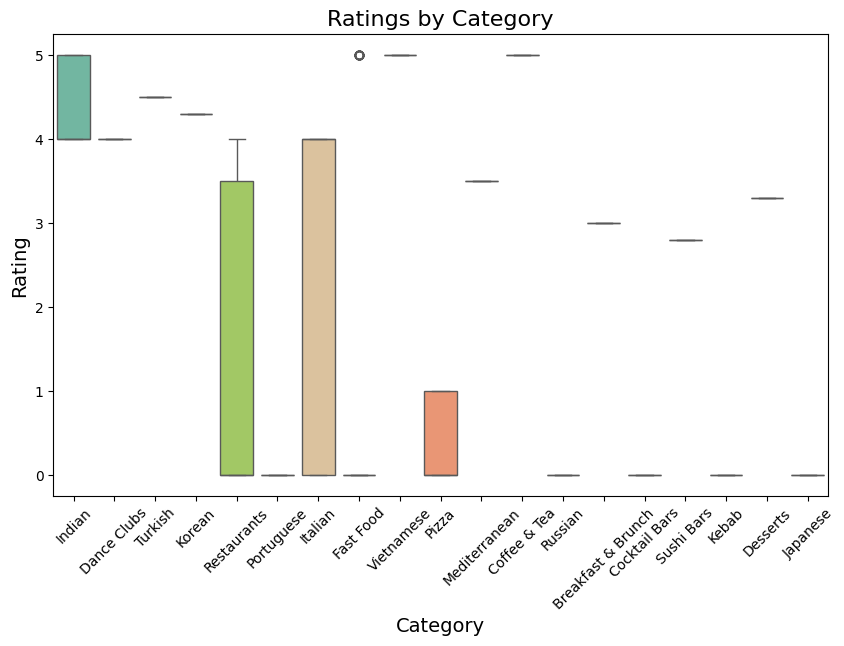

In [ ]:
# boxplot showing relationship between category vs yelp rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='category', y='rating', palette='Set2')
# titles and lables
plt.title('Ratings by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
# Create connection to SQLite database
conn = sqlite3.connect('data/poi_data.db') 
cursor = conn.cursor()

# Save DataFrame into database
combined_df.to_sql('poi_table', conn, if_exists='replace', index=False)

# query to validate database
result = pd.read_sql_query("SELECT * FROM poi_table LIMIT 5;", conn)
print(result)

# Close the connection
conn.close()

     station_name      yelp_name    distance           name   latitude  \
0  Grimaldi Forum     New Indian  481.870037     New Indian  43.743545   
1  Grimaldi Forum          Twiga  278.421562          Twiga  43.743545   
2  Grimaldi Forum  Premier Kebap  402.096402  Premier Kebap  43.743545   
3  Grimaldi Forum         Apsara  310.618829         Apsara  43.743545   
4  Grimaldi Forum     La Véranda  479.980794     La Véranda  43.743545   

   longitude  available_bikes  empty_slots     category  \
0   7.431086                3           13       Indian   
1   7.431086                3           13  Dance Clubs   
2   7.431086                3           13      Turkish   
3   7.431086                3           13       Korean   
4   7.431086                3           13  Restaurants   

                                             address  rating        lat  \
0          9 bd République, 06240 Beausoleil, France     4.0  43.742530   
1          Blve.Louis II 35, 98000 Zacatecas, Mexi

Look at the data before and after the join to validate your data.

In [52]:
# Validate row counts
print("Rows in Part 1:", stations_Monaco_df.shape[0])
print("Rows in Part 2:", yelp_df.shape[0])
print("Rows after join:", combined_df.shape[0])

# Check for null values
print("Null values in joined data:")
print(combined_df.isnull().sum())

Rows in Part 1: 53
Rows in Part 2: 418
Rows after join: 3143
Null values in joined data:
station_name        0
yelp_name           0
distance            0
name                0
latitude            0
longitude           0
available_bikes     0
empty_slots         0
category           90
address             0
rating              0
lat                 0
lon                 0
dtype: int64
